BINARY CLASSIFICATION USING TITANIC DATASET.

Import the necessary libraries

1. Pandas is used for data manipulation and analysis.
2. Numpy is used for numerical computations and working with arrays.
3. Matplotlib is used for creating visualizations (plots and charts).
4. Seaborn is built on top of Matplotlib and provides an interface for creating more aesthetically pleasing visualizations.

Importing modules for Machine Learning

1. Splits the dataset into training and testing sets for model evaluation.
2. RandomForestClassifier is a machine learning algorithm used for classification tasks.
3. These are used to evaluate the model's performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the Data

In [ ]:
# Importing the 'files' module from Google Colab to handle file uploads
from google.colab import files

# Prompts user to upload files, and stores the uploaded files in a dictionary
uploaded = files.upload()

# Replace 'Titanic.csv' with the name of the file you uploaded
df = pd.read_csv('Titanic.csv')

# Display the first few rows of the dataset
df.head()

Saving Titanic.csv to Titanic (6).csv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


Exploring the Data

In [ ]:
# Counts the number of missing (null) values in each column of the DataFrame.
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
# Displays the data types of each column in the DataFrame.
df.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [ ]:
# Counts the occurrences of each unique value in the 'Sex' column.
df['Sex'].value_counts()

,count
Sex,
male,527
female,473


 The below piece of code transforms the 'Sex' column in the DataFrame (df) by encoding the values ('male' and 'female') into numerical values (0 and 1, respectively) using the Sex_encode function.

 After encoding, it counts how many times each encoded value (0 and 1) appears in the 'Sex' column using value_counts(). This helps in understanding the distribution of male and female passengers in the dataset after encoding.



In [ ]:
def Sex_encode(sex):
    # If the input 'sex' is 'male', return 0
    if sex == 'male':
        return 0
    # If the input 'sex' is 'female', return 1
    elif sex == 'female':
        return 1
    # If the input 'sex' is neither 'male' nor 'female', return None
    else:
        return None

In [ ]:
# Applies the Sex_encode function to the 'Sex' column and then counts the occurrences of each encoded value.
df['Sex'] = df['Sex'].apply(Sex_encode)

df['Sex'].value_counts()

,count
Sex,
0,527
1,473


In [ ]:
# Displays the 'Name' column of the DataFrame.
df['Name']

,Name
0,Allison Hill
1,Noah Rhodes
2,Angie Henderson
3,Daniel Wagner
4,Cristian Santos
...,...
995,Brittany Ward
996,Edward Stanley
997,Christina Johnson
998,Edgar Miller


In [ ]:
# Displays the names of all columns in the DataFrame.
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
# Displays the data types of each column in the DataFrame.
df.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,int64
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [ ]:
# Creates a new DataFrame containing only selected columns from the original DataFrame.
dataframe=df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Survived']]
dataframe

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,0,17,4,2,1
1,1,0,60,2,2,0
2,3,0,64,0,0,1
3,3,0,35,4,0,1
4,1,1,70,0,3,1
...,...,...,...,...,...,...
995,2,0,69,2,3,1
996,2,1,61,4,4,0
997,3,0,10,4,1,0
998,3,0,50,3,2,1



Explanation of the code:
X = dataframe.drop('Survived', axis=1):

Purpose: This line creates a new DataFrame X by dropping the 'Survived' column from the dataframe.
drop('Survived', axis=1):
drop: Removes specified columns or rows.
'Survived': The column to be removed.
axis=1: Specifies that the operation is to be performed on columns (use axis=0 for rows).
Result: X will contain all the columns from dataframe except 'Survived', which are the feature variables used to predict survival.
Y = dataframe['Survived']:

Purpose: This line creates a new Series Y that contains only the 'Survived' column from the dataframe.
Result: Y will hold the target variable (the label) that we are trying to predict, which is whether the passenger survived or not.

In [ ]:
# Splits the dataframe into feature variables (X) and target variable (Y) for prediction.
X= dataframe.drop('Survived',axis=1)
Y=dataframe['Survived']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(X, Y)  # Fit to the data
df_scores = pd.DataFrame(fit.scores_)  # Scores of each feature
df_columns = pd.DataFrame(X.columns)   # Names of features
feature_scores = pd.concat([df_columns, df_scores], axis=1)  # Combine into one DataFrame
feature_scores.columns = ['Features', 'Score']  # Rename columns
print(feature_scores.nlargest(5, 'Score'))  # Display top 10 features

  Features     Score
4    Parch  3.988231
3    SibSp  1.160369
0   Pclass  0.560194
2      Age  0.511674
1      Sex  0.221247


In [ ]:
# Selects specific columns from the dataframe to be used as feature variables (X) for prediction.
X=df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

1. We first import the SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the imblearn library. SMOTE is used for handling class imbalance by creating synthetic examples for the minority class to balance the class distribution.
2. This initializes the SMOTE object. The random_state=42 ensures reproducibility, meaning the same random samples will be generated each time you run the code.
3. The fit_resample() function applies the SMOTE algorithm to the features (X) and target (Y) variables. X_resampled and y_resampled are the resampled features and target, respectively. The minority class in y_resampled is now oversampled to balance the class distribution.
4. This checks the distribution of the classes in the resampled target variable y_resampled after applying SMOTE. It shows how many instances belong to each class (e.g., Survived and Not Survived) after oversampling.

In [ ]:
from imblearn.over_sampling import SMOTE
# Define SMOTE model and apply it I use over sampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check new class distribution
# print("Resampled Class Distribution:", Counter())
y_resampled.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
Survived,
1,508
0,508


Gradient Boosting Classifier Method

In [ ]:
# Splits the resampled dataset into training and testing sets with 70% for training and 30% for testing.
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [ ]:
# Initializes and trains a GradientBoostingClassifier model on the training data with specified hyperparameters.
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
# Importing performance metrics functions to evaluate the model's predictions.
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Predicting the target variable for the test dataset using the trained model.
y_pred=model.predict(X_test)

# Predicting the target variable for the training dataset using the trained model.
X_trian_prediction=model.predict(X_train)

# Calculating the accuracy of the model's predictions on the test dataset.
TestAccuracy= accuracy_score(y_pred,y_test)

# Calculating the accuracy of the model's predictions on the training dataset.
TrainAccuracy=accuracy_score(X_trian_prediction,y_train)

# Printing the accuracy score for the test dataset.
print(TestAccuracy)

# Printing the accuracy score for the training dataset.
print(TrainAccuracy)

0.5311475409836065
0.7524613220815752


In [ ]:
# Importing the 'cross_val_score' function from sklearn to perform cross-validation on the model.
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the model using the training data (X_train and y_train).
# 'cv=5' indicates the data will be split into 5 subsets, and the model will be trained and evaluated 5 times.
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculating the mean of the cross-validation scores (accuracy) and printing it with 4 decimal places.
# np.mean(cv_scores) calculates the average of the accuracy scores from the 5 folds.
print(f'Cross-validated accuracy: {np.mean(cv_scores):.4f}')

Cross-validated accuracy: 0.5204


In [ ]:
# Inspect the data structure
print(titanic.info())

# Display summary statistics
print(titanic.describe())

# Check the first few rows
print(titanic.head())

# Check for missing values
print(titanic.isnull().sum())

# Display dataset structure
print(titanic.info())

# Summary statistics for numeric columns
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          0 non-null      float64
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Survived     1000 non-null   int64  
 10  Embarked_Q   1000 non-null   bool   
 11  Embarked_S   1000 non-null   bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 80.2+ KB
None
       PassengerId       Pclass  Sex          Age        SibSp        Parch  \
count  1000.000000  1000.000000  0.0  1000.000000  1000.000000  1000.000000   
mean    500.500000     1.964000  NaN    38.458000     2.032000     2.00

Visualising the Dataset

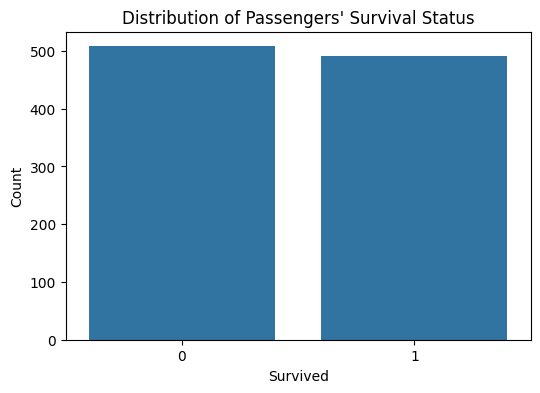

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='Survived')
plt.title('Distribution of Passengers\' Survival Status')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

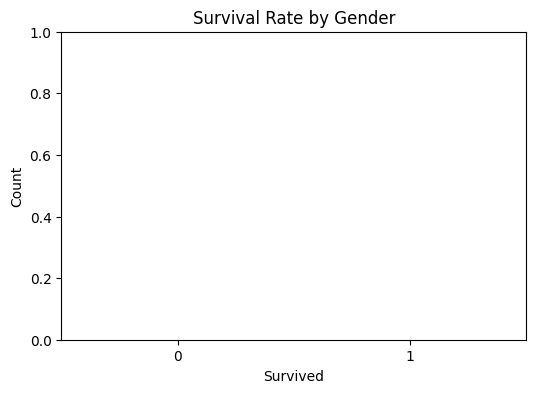

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='Survived', hue='Sex')
plt.title('Survival Rate by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Logistic Regression Method

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Assuming X_resampled and y_resampled are already defined
# Splitting the resampled dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [ ]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.4786885245901639
Confusion Matrix:
 [[ 94  44]
 [115  52]]


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Assuming X_resampled and y_resampled are already defined
# Splitting the resampled dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [ ]:
# Create the k-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

In [ ]:
# Perform cross-validation on the training set (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation

In [ ]:
# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.51048951 0.52112676 0.54225352 0.54929577 0.57042254]
Average cross-validation score: 0.5387176204077613


In [ ]:
# Train the model on the full training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy on Test Set:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy on Test Set: 0.521311475409836
Confusion Matrix:
 [[86 52]
 [94 73]]
